In [12]:
# how to train a baseline Random Forest moddel using TensorFlow Decision Forests on the Hose Prices dataset
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
print("TensorFlow v" + tf.__version__)
print("TensorFLow Decision Forests v" + tfdf.__version__)

TensorFlow v2.18.0
TensorFLow Decision Forests v1.11.0


In [14]:
# load the dataset
train_file_path = "project/train.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


In [15]:
# the data is composed of 81 columns and 1460 entries
# its possible to see all 81 dimensions of the dataset printing out the first 3 entries 

dataset_df.head(3)

# so there are 79 feature columns. Using these features your model has to predict the house price indicated by the mlabel columns SalePrice

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [16]:
# since the Id column is not necessary for the model training we can drop it

dataset_df = dataset_df.drop('Id', axis=1)
dataset_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [17]:
# to inspect the types of feature columns 

dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<Axes: xlabel='SalePrice', ylabel='Count'>

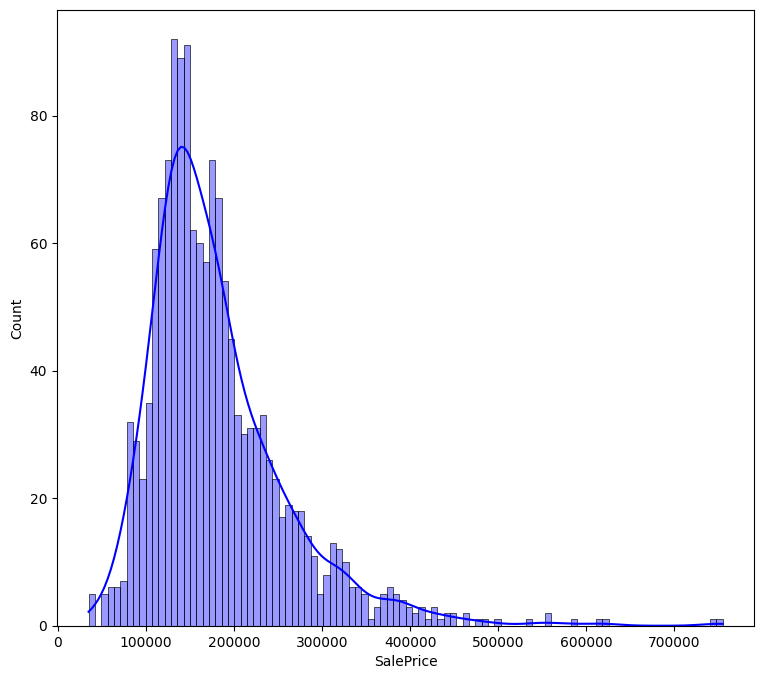

In [18]:
# taking a look at how the house prices are distributed

print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(9,8))
sns.histplot(dataset_df['SalePrice'], color='blue', bins=100, kde=True, alpha=0.4)

In [19]:
# list all of the types of data from dataset and select only the numerical ones
list(set(dataset_df.dtypes.tolist()))
df_num = dataset_df.select_dtypes(include=['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

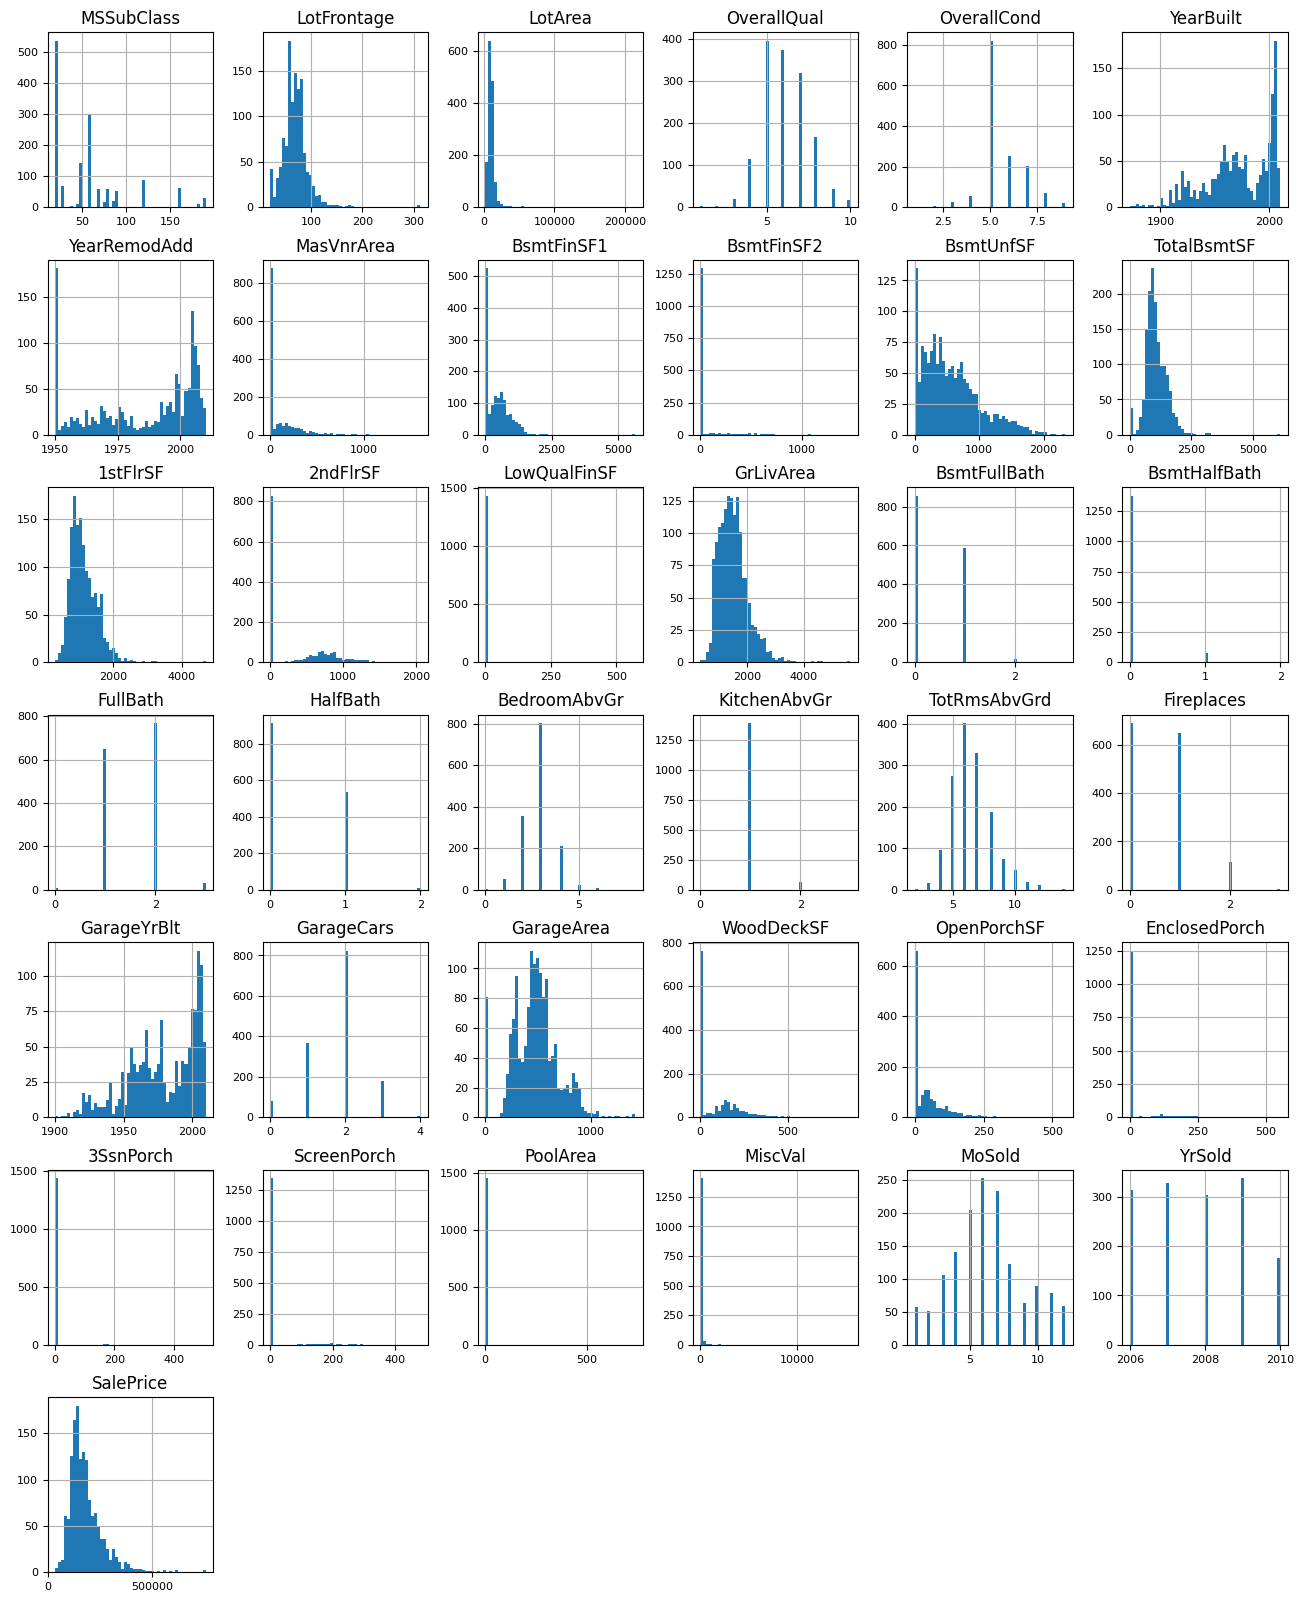

In [20]:
# plotting the distribution for all numerical features
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

this dataset contains a mix of numeric, categoricam and missing features
TF-DF supports all these features types natively and no processing is required
this is one advantage of tree-based models

In [21]:
# this dataset contains a mix of numeric, categoricam and missing features
# TF-DF supports all these features types natively and no processing is required
# this is one advantage of tree-based models

# splitting the data set into training and testing 
import numpy as np

# define a function to split the dataset into train and test data
def split_dataset(dataset, test_fraction=0.3):

    # random number betwee 0 and 1 for each sample in the dataset
    random_numbers = np.random.rand(len(dataset))
    print("random_numbers: {}".format(random_numbers))
    

    # boolean mask where True indicates the sample should go to the test set
    test_mask = random_numbers < test_fraction
    print("test_mask: {}".format(test_mask))

    # training set includes all samples where test_mask is False
    train_set = dataset[~test_mask]
    print("train_set: {}".format(train_set))

    # test set includes all samples where test_mask is True
    test_set = dataset[test_mask]
    print("test_set: {}".format(test_set))

    return train_set, test_set

# example usage with a DataFrame called dataset_df
train_data, test_data = split_dataset(dataset_df)

# print out the number of ewamples in each set
print("Training examples:", len(train_data))
print("Testing examples:", len(test_data))

random_numbers: [0.90699371 0.20871843 0.93604925 ... 0.90849405 0.05314375 0.03813345]
test_mask: [False  True False ... False  True  True]
train_set:       MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
6             20       RL         75.0    10084   Pave   NaN      Reg   
...          ...      ...          ...      ...    ...   ...      ...   
1452         180       RM         35.0     3675   Pave   NaN      Reg   
1453          20       RL         90.0    17217   Pave   NaN      Reg   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     90

there is one more step required before train the model. Convert the dataset from Pandas format into TensorFlow datasets format.

TensorFlow Datasets is a high performance data loading library which is helpful when training neural networks with accelerators like GPUs and TPUs.